## **06-07 다중 입력에 대한 실습**

이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 다중 입력에 대한 실습 튜토리얼 자료입니다.  

링크 : https://wikidocs.net/35821

In [1]:
import tensorflow as tf
tf.__version__

'2.19.0'

독립 변수 x가 2개 이상인 경우에 대해서 학습합니다. 비용 함수와 옵티마이저 등을 사용하는 방법은 동일합니다.

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

### **1. 다중 선형 회귀**

딥 러닝 챕터로 들어가게되면 대부분의 입력들은 독립 변수가 2개 이상입니다. 모델을 직접 코딩하는 관점에서는 입력 벡터의 차원이 2이상이라고 할 수 있습니다.  y를 결정하는데 있어 독립 변수가 3개인 선형 회귀를 풀어봅시다. 중간 고사, 기말 고사, 그리고 추가 점수를 어떤 공식을 통해 최종 점수를 계산한 데이터가 있습니다.

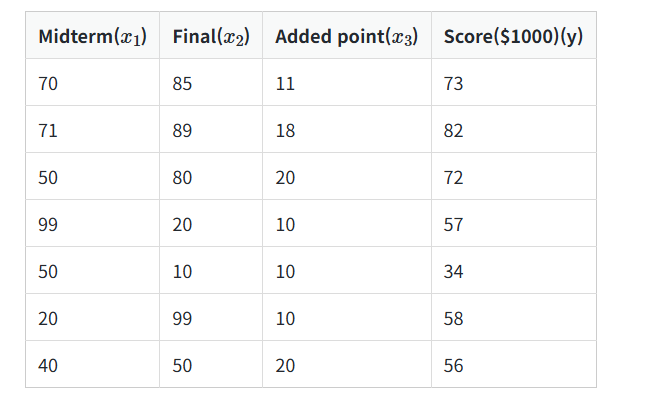

$$H(X) = {w_1x_1 + w_2x_2 + w_3x_3 + b}$$

3개의 특성을 가진 벡터 $[x_1, x_2, x_3]$를 대문자 $X$로 표기합니다.

위 데이터의 샘플 중 상위 5개의 데이터만 훈련에 사용하고, 나머지 2개는 테스트에 사용해보겠습니다. 입력의 차원이 3으로 바뀌면서, input_dim의 인자값이 3으로 변경됩니다. 이는 입력 벡터의 $X$의 원소의 개수가 3개라고도 표현할 수 있고, 입력 벡터 $X$의 차원이 3임을 의미합니다.

In [3]:
# 중간 고사, 기말 고사, 가산점 점수
X = np.array([[70, 85, 11], [71, 89, 18], [50, 80, 20], [99, 20, 10], [50, 10, 10]]) 
y = np.array([73, 82, 72, 57, 34]) # 최종 성적

model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

sgd = optimizers.SGD(learning_rate=0.0001)
# model.compile(optimizer='sgd', loss='mean_squared_error')  # 발산
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])   # learning_rate를 줄여서 발산하지 않도록!
model.fit(X, y, epochs=2000)

Epoch 1/2000


c:\Users\dlwlg\anaconda3\envs\py310_yolo\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - loss: 410.2043 - mse: 410.2043
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 291.7248 - mse: 291.7248
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 213.6018 - mse: 213.6018
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 161.9259 - mse: 161.9259
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 127.6358 - mse: 127.6358
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 104.8039 - mse: 104.8039
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 89.5392 - mse: 89.5392
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 79.2808 - mse: 79.2808
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 72.3389 - mse: 72.3389
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 67.5967 - mse: 67.5967
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 64.3151 - mse: 64.3151
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 62.0042 - mse: 62.0042
Epoch 13/2000

모델의 학습이 끝났습니다. 학습된 모델에 입력 X에 대한 예측을 해봅시다.

In [7]:
X

array([[70, 85, 11],
       [71, 89, 18],
       [50, 80, 20],
       [99, 20, 10],
       [50, 10, 10]])

In [8]:
print(model.predict(X[:2]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[[72.925026]
 [81.97972 ]]


실제값에 근접한 예측을 하는 것을 볼 수 있습니다. 훈련할 때 사용하지 않았던 데이터를 가지고 예측 작업을 수행해보겠습니다.

In [9]:
X_test = np.array([[20, 99, 10], [40, 50, 20]]) # 각각 58점과 56점을 예측해야 합니다.
print(model.predict(X_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[57.882412]
 [56.062492]]


### **2. 다중 로지스틱 회귀**

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
</math>를 결정하는데 있어 독립 변수 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>x</mi>
</math>
가 2개인 로지스틱 회귀를 풀어봅시다. 꽃받침(Sepal)의 길이와 꽃잎(Petal)의 길이와 해당 꽃이 A인지 B인지가 적혀져 있는 데이터가 있을 때, 새로 조사한 꽃받침의 길이와 꽃잎의 길이로부터 무슨 꽃인지 예측할 수 있는 모델을 만들고자 한다면 이때 독립 변수 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>x</mi>
</math>
는 2개가 됩니다.

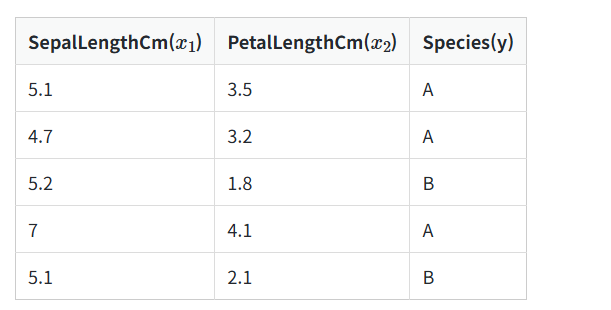

$$H(X) = sigmoid({w_1x_1 + w_2x_2 + b})$$


2개의 특성을 가진 벡터 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mo stretchy="false">[</mo>
  <msub>
    <mi>x</mi>
    <mn>1</mn>
  </msub>
  <mo>,</mo>
  <msub>
    <mi>x</mi>
    <mn>2</mn>
  </msub>
  <mo stretchy="false">]</mo>
</math>를 대문자 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>X</mi></math>로 표기합니다.

독립 변수가 2개인 좀 간단한 새로운 예를 들어서 이를 케라스로 구현해봅시다. 두 개의 입력 $x_1$, $x_2$
의 합이 2이상이면 출력값 $y$가 1이 되고 두 개의 입력의 합이 2미만인 경우에만 출력값이 0이 되는 로직을 구현해봅시다.


앞서 실습한 로지스틱 회귀 코드와 거의 동일한데 달라진 점은 입력의 차원이 2로 바뀌면서 input_dim의 값이 2라는 점입니다. 이는 입력 벡터의 차원이 2임을 의미합니다.

In [10]:
X = np.array([[0, 0], [0, 1], [1, 0], [0, 2], [1, 1], [2, 0]])
y = np.array([0, 0, 0, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - binary_accuracy: 0.6667 - loss: 0.7160
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - binary_accuracy: 0.6667 - loss: 0.7155
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - binary_accuracy: 0.6667 - loss: 0.7149
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - binary_accuracy: 0.6667 - loss: 0.7143
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - binary_accuracy: 0.6667 - loss: 0.7137
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - binary_accuracy: 0.6667 - loss: 0.7131
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - binary_accuracy: 0.6667 - loss: 0.7126
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - binary_accuracy: 0.6667 - loss: 0.7120
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - binary_accuracy: 0.6667 - loss: 0.7114
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - binary_accuracy: 0.6667 - loss: 0.7108
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - binary_accuracy: 0.6667 

2000에포크 정도로 학습을 멈추고 각 입력에 대해서 출력값이 0.5보다 크고 작은지를 확인해보겠습니다.

In [11]:
print(model.predict(X))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[[0.16842914]
 [0.44472983]
 [0.45562795]
 [0.76002663]
 [0.7679652 ]
 [0.7757186 ]]


In [12]:
y

array([0, 0, 0, 1, 1, 1])

In [16]:
((model.predict(X) > 0.5) * 1).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([0, 0, 0, 1, 1, 1])

입력의 합이 2이상인 경우에는 전부 값이 0.5를 넘는 것을 볼 수 있습니다.

### **3. 인공 신경망 다이어그램**
다중 로지스틱 회귀를 인공 신경망의 형태로 표현하면 다음과 같습니다. 아직 인공 신경망을 배우지 않았음에도 이렇게 다이어그램으로 표현해보는 이유는 로지스틱 회귀를 일종의 인공 신경망 구조로 해석해도 무방함을 보여주기 위함입니다.

$$y = sigmoid(w_1x_1 + w_2x_2 + w_3x_3 + ... + w_nx_n + b) = σ(w_1x_1 + w_2x_2 + w_3x_3 + ... + w_nx_n + b)$$


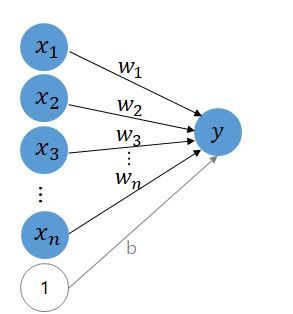

마지막 편집일시 : 2023년 7월 18일 6:21 오후